In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df=pd.read_csv("./data/USA_Housing.csv")

In [3]:
df.keys()

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [10]:
df['Avg. Area Income1']=df['Avg. Area Income'].apply(lambda x: np.log(x))

In [16]:
np.var(df['Avg. Area Income1'])

0.026023249660278462

In [19]:
np.std(df['Avg. Area Income1'])

0.16131723299225803

<AxesSubplot:>

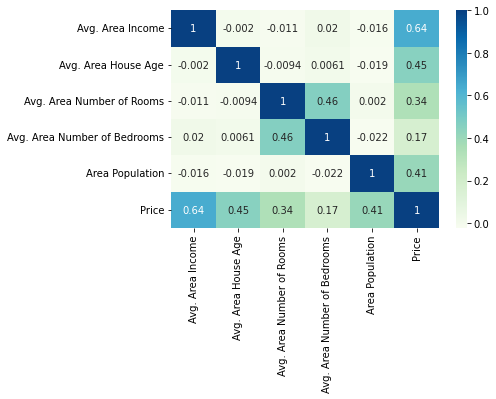

In [4]:
sns.heatmap(df.corr(),cmap="GnBu",annot=True)

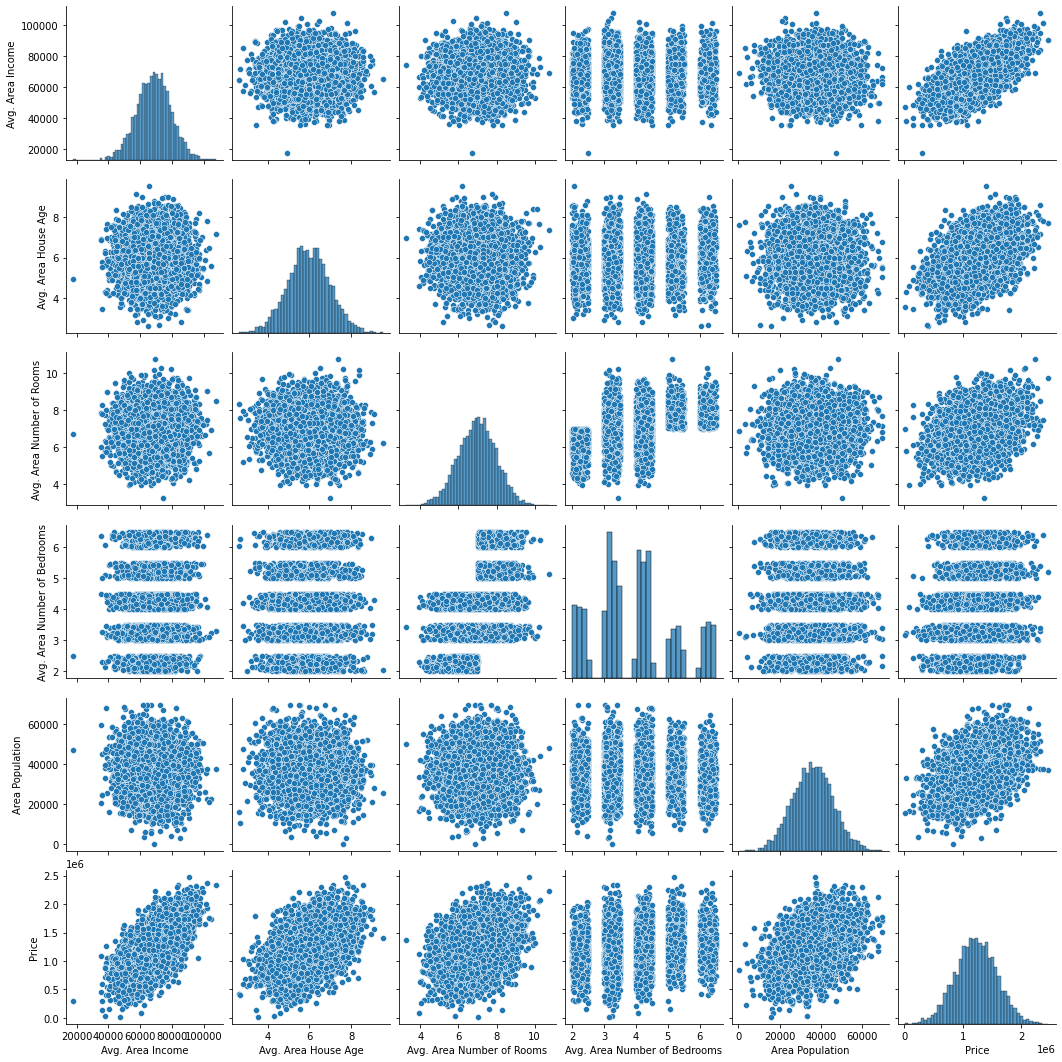

In [5]:
sns.pairplot(df)

<AxesSubplot:xlabel='Avg. Area Income', ylabel='Price'>

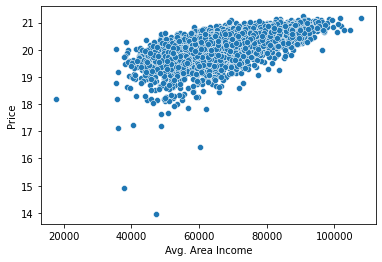

In [6]:
sns.scatterplot(y=np.log2(df["Price"]),x=df["Avg. Area Income"])

In [16]:
# sns.histplot(np.log10(df["Price"]))
# df.describe()
np.std(df["Price"])
np.log1p()

353082.3130526381

In [21]:
x = np.array([1, 2, 3])
# c=x[np.newaxis,:]
x[:,np.newaxis]

array([[1],
       [2],
       [3]])

In [7]:
a1,a2,s1,s2=train_test_split(df.iloc[:,:-2],df.iloc[:,-2:-1],test_size=0.4,random_state=101)

In [8]:
s1

,Price
1303,1.489648e+06
1051,1.183015e+06
4904,1.547889e+06
931,1.186442e+06
4976,1.340344e+06
...,...
4171,7.296417e+05
599,1.599479e+06
1361,1.102641e+06
1547,8.650995e+05


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lm=LinearRegression()

In [11]:
lm.fit(a1,s1)

LinearRegression()

In [12]:
lm.coef_

array([[2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
        1.51504200e+01]])

In [13]:
d=lm.predict(a2)

<AxesSubplot:ylabel='Count'>

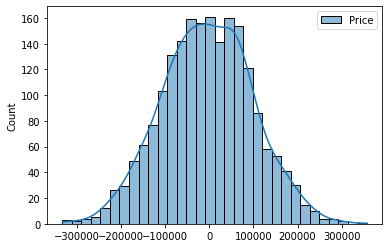

In [14]:
sns.histplot((s2-d),kde=True)

<AxesSubplot:xlabel='Price'>

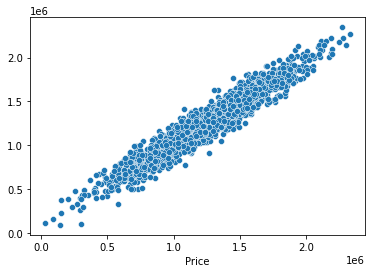

In [15]:
x1=s2["Price"]
x2=d
x2=x2.reshape(2000)
sns.scatterplot(x=x1,y=x2,)

In [16]:
x1.shape

(2000,)

In [17]:
type(x2)

numpy.ndarray

In [18]:
from sklearn import metrics

In [19]:
metrics.mean_absolute_error(s2,d)

82288.22251914928

In [20]:
metrics.mean_squared_error(s2,d)

10460958907.208244

In [21]:
np.sqrt(metrics.mean_squared_error(s2,d))

102278.82922290538

In [5]:
sw=pd.read_csv("./data/Ecommerce Customers")

In [5]:
sw

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [24]:
d=lambda x: x.split("@")[1]
sw["Domain"]=sw["Email"].apply(d)

In [25]:
sw.Domain.value_counts()

gmail.com             87
hotmail.com           87
yahoo.com             76
edwards.com            2
jones.com              2
                      ..
ryan.biz               1
mcdonald-smith.biz     1
sawyer-sellers.com     1
smith-pena.com         1
hoffman-wolfe.org      1
Name: Domain, Length: 244, dtype: int64

In [26]:
sf=sw.groupby("Domain")

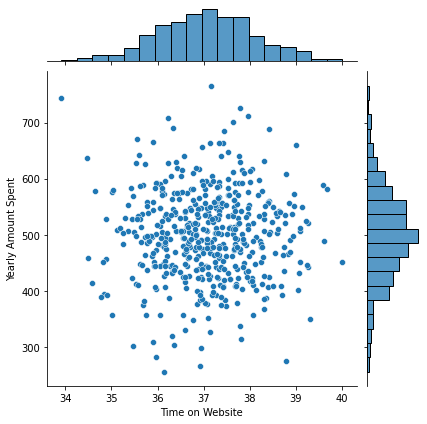

In [27]:
sns.jointplot(data=sw,x="Time on Website",y="Yearly Amount Spent")

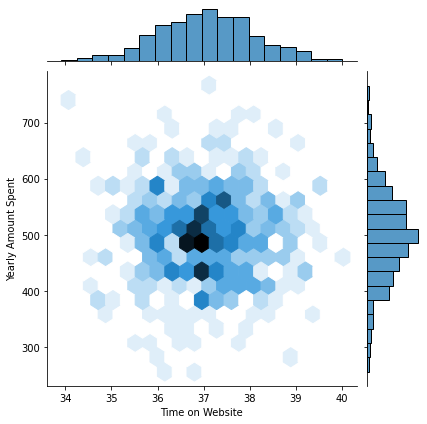

In [31]:
sns.jointplot(data=sw,x="Time on Website",y="Yearly Amount Spent",kind='hex')

## how to find min and max for c data type

In [16]:
np.int8 # then tab+shift

In [3]:
x=np.arange(-100,1000,10)

In [4]:
np.absolute(x)

array([100,  90,  80,  70,  60,  50,  40,  30,  20,  10,   0,  10,  20,
        30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150,
       160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280,
       290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410,
       420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540,
       550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670,
       680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800,
       810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930,
       940, 950, 960, 970, 980, 990])

In [5]:
np.alltrue(x)

False

In [6]:
x-1

array([-101,  -91,  -81,  -71,  -61,  -51,  -41,  -31,  -21,  -11,   -1,
          9,   19,   29,   39,   49,   59,   69,   79,   89,   99,  109,
        119,  129,  139,  149,  159,  169,  179,  189,  199,  209,  219,
        229,  239,  249,  259,  269,  279,  289,  299,  309,  319,  329,
        339,  349,  359,  369,  379,  389,  399,  409,  419,  429,  439,
        449,  459,  469,  479,  489,  499,  509,  519,  529,  539,  549,
        559,  569,  579,  589,  599,  609,  619,  629,  639,  649,  659,
        669,  679,  689,  699,  709,  719,  729,  739,  749,  759,  769,
        779,  789,  799,  809,  819,  829,  839,  849,  859,  869,  879,
        889,  899,  909,  919,  929,  939,  949,  959,  969,  979,  989])

In [66]:
c=np.array(['s','s'],'c')

AttributeError: 'numpy.bytes_' object has no attribute 'bsize'

In [68]:
c

array([b's', b's'], dtype='|S1')

In [72]:
x[x>0]

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])

In [6]:
sw

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [43]:
sw.iloc[:,0].apply(lambda x : x.split("@")[1]).value_counts().head()

john85           2
melissa08        2
lisagutierrez    1
esmith           1
hevans           1
Name: Email, dtype: int64

In [8]:
f=sw.groupby("Avatar")

In [30]:
b=f.describe()

In [36]:
b.sort_values(by=b["Avg. Session Length"]["count"]).head(1)

In [62]:
sw.iloc[:,1].apply(lambda v : v.split(",")[1]).value_counts()

IndexError: list index out of range

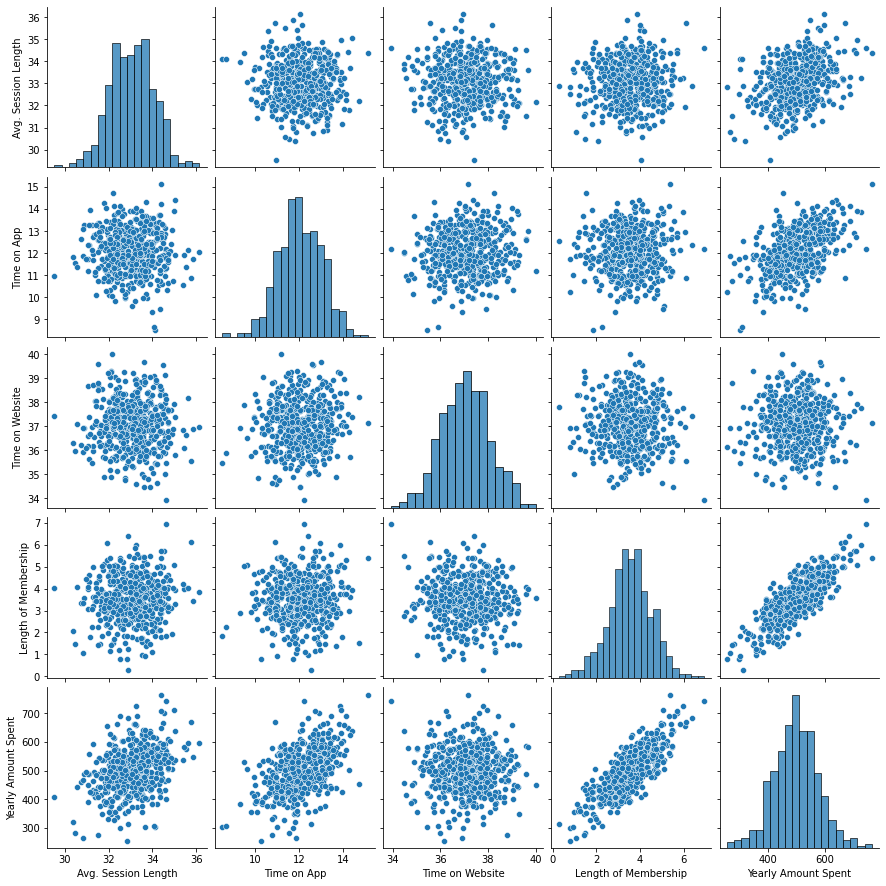

In [66]:
sns.pairplot(sw)

In [6]:
xs=sw["Length of Membership"]
ys=sw[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Yearly Amount Spent']]

In [7]:
sw.keys()

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split

In [21]:
a1,a2,s1,s2=train_test_split(xs,ys,test_size=0.4,random_state=101)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm=LinearRegression()

In [32]:
lm.fit(s1,a1)

LinearRegression()

In [33]:
pr=lm.predict(s2)

<AxesSubplot:ylabel='Length of Membership'>

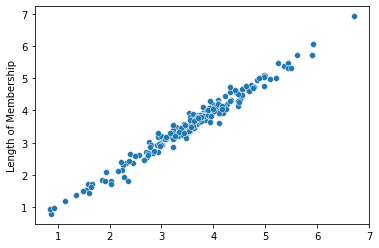

In [36]:
sns.scatterplot(x=pr,y=a2)

<AxesSubplot:xlabel='Length of Membership', ylabel='Count'>

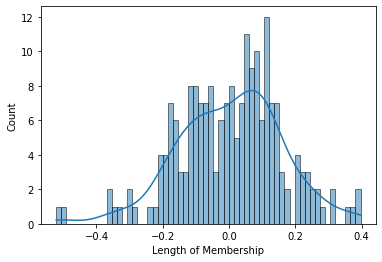

In [56]:
sns.histplot((a2-pr),bins=60,kde=True)

In [2]:
import json

In [3]:
s=json.load(open("states_india.geojson",'r'))
# s['features'][0]

# how to extract data out of wikipidea pages with pandas

In [5]:
# dfs=pd.read_html("https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_population")

# dfs have multiple tables as in web page of wiki
len(dfs)

In [7]:
# dfs[0]

In [8]:
# dfs[1].to_csv("test_data_for_chloro")

In [4]:
f=pd.read_csv("test_data_for_chloro")

In [5]:
f.keys()

Index(['Unnamed: 0', 'Rank', 'State or union territory', 'Population',
       'National Share (%)', 'Decadal growth(2001–2012)', 'Rural population',
       'Percent rural', 'Urban population', 'Percent urban', 'Area[16]',
       'Density[a]', 'Sex ratio'],
      dtype='object')

In [6]:
sim={}
for feature in s["features"]:
    feature['id']=feature['properties']['state_code']
    sim[feature['properties']['st_nm']]= feature['id']

In [7]:
f['chstate']=f['State or union territory'].apply(lambda x: x.replace(" and "," & "))
f['chstate1']=f['chstate'].apply(lambda x: (x.replace("[d]","")))
f['chstate2']=f['chstate1'].apply(lambda x: x.replace('Arunachal Pradesh','Arunanchal Pradesh'))
f['chstate3']=f['chstate2'].apply(lambda x: x.replace('Dadra & Nagar Haveli & Daman & Diu','Daman & Diu'))
f['chstate4']=f['chstate3'].apply(lambda x: x.replace('Ladakh','Dadara & Nagar Havelli'))
f['chstate5']=f['chstate4'].apply(lambda x: x.replace('Andaman & Nicobar Islands','Andaman & Nicobar Island'))
f['id']=f['chstate5'][:-1].apply(lambda x :sim[x])

In [8]:
# sim.keys()

In [21]:
import plotly.express as px
# import plotly.figure_factory as ff
# from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
# init_notebook_mode(connected=False)
# import plotly.io as io
# io.renderers.default='firefox'

In [22]:
# f.info()
import plotly as pl
import plotly.express as ff

In [24]:
# f1=f.iloc[:-1]
# fi=ff.choropleth(f1[['chstate5','id','Urban population']],locations='id',geojson=s
#                  ,color='Urban population',scope='asia',
#                  hover_name='chstate5')
# fi.update_geos(fitbounds='locations',visible=False,countrywidth=50,countrycolor="white")
# # iplot(fi,validate=False,filename='d3-world-map',image="jpeg")

In [17]:
# s["features"][2]['id'] == 28.0

True

In [18]:
sim.keys() is np.array(f["chstate5"])

False

In [31]:
# sorted(sim.keys())
# sorted(sim.items(),key= lambda x:x[1] )

In [30]:
# f1[['chstate5','id']].sort_values(by='id')

In [3]:
plp=pd.read_csv('Document.csv')

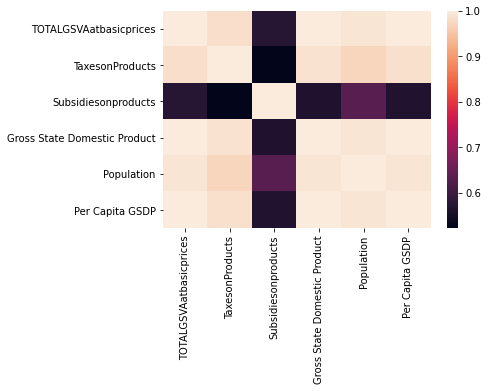

In [36]:
# sns.pairplot(plp.iloc[:,:5])
# plp.corr()
plp.iloc[:,:10]
d=sns.heatmap(plp.iloc[:,:].corr())
# d.write_to("mk")

<AxesSubplot:ylabel='Count'>

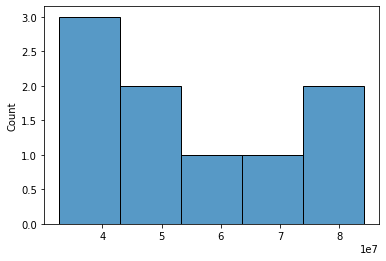

In [55]:
sns.scatterplot(plp["Gross State Domestic Product"]-plp["Crops"])

In [17]:
import pandas as pd
import matplotlib.pyplot as mp
import sklearn.datasets as sd
import numpy as np

In [80]:
i=sd.load_boston()

In [81]:
i.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [82]:
f=pd.DataFrame(data=i.data,columns=i.feature_names)

In [83]:
f.shape

(506, 13)

In [88]:
print(f.describe())
print(i.DESCR)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057